In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import mysql.connector
from mysql.connector import errorcode
from urllib.parse import quote_plus
from sqlalchemy import create_engine

In [5]:
config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Physic955',
    'database': 'Basketball_Reference'
}

password = quote_plus("Physic955")
engine = create_engine(
    f"mysql+mysqlconnector://{config['user']}:{password}@{config['host']}/{config['database']}"
)

In [11]:
query = """
    SELECT 
        p.Name,
        (p.Height / p.Weight) AS Agility,
        s.Season,
        CASE 
            WHEN s.Season IN ('2020-21','2021-22') THEN 'قدیم'
            ELSE 'جدید'
        END AS Period
    FROM players p
    JOIN player_ranks pr ON p.PlayerID = pr.PlayerID
    JOIN seasons s ON pr.SeasonID = s.SeasonID
    WHERE pr.Rank <= 20 
        AND s.Season IN ('2020-21','2021-22','2022-23','2023-24')
    ORDER BY 
        Period,
        s.Season,
        Agility DESC;
"""
top20 = pd.read_sql(query, engine)
        
old_period = top20[top20['Period'] == 'قدیم']['Agility'].values
new_period = top20[top20['Period'] == 'جدید']['Agility'].values

In [ ]:
print('old period')
print("\n")
print(pd.Series(old_period).describe())
print("\n")
print("\n")
print('new period')
print("\n")
print(pd.Series(new_period).describe())

old period


count    40.000000
mean      2.037790
std       0.241249
min       1.546900
25%       1.903300
50%       1.985300
75%       2.177800
max       2.500000
dtype: float64




new period


count    40.000000
mean      2.039425
std       0.203166
min       1.648400
25%       1.903800
50%       2.000000
75%       2.179850
max       2.500000
dtype: float64


<div style="font-family:Tahoma, sans-serif; direction:rtl; line-height:1.8; font-size:15px; text-align:justify; padding:12px; border:1px solid #ddd; border-radius:8px; box-sizing:border-box; max-width:100%; margin:0 auto;">
  <p>
    مقایسه میانگین‌ها نشان می‌دهد که چابکی متوسط در دوسال جدید (۲.۰۳۹۴۲۵) اندکی بیشتر از دوسال قدیم (۲.۰۳۷۷۹۰) است، 
    با اختلاف ناچیز ۰.۰۰۱۶۳۵ (تقریباً ۰.۰۸%).
  </p>
  <p>
    انحراف معیار در دوسال جدید (۰.۲۰۳۱۶۶) کمی کمتر از دوسال قدیم (۰.۲۴۱۲۴۹) است، 
    که می‌تواند نشان‌دهنده یکنواختی بیشتر چابکی در بازیکنان برتر جدید باشد.
  </p>
  <p>
    با این حال، این تفاوت‌ها از نظر عددی بسیار کوچک هستند و به‌تنهایی نمی‌توانند فرضیه افزایش چابکی را تأیید کنند، 
    مگر اینکه با تست آماری معنادار شوند.
  </p>
</div>


In [18]:
shapiro_old = stats.shapiro(old_period)
shapiro_new = stats.shapiro(new_period)
print(f"\nShapiro-Wilk Test for Normality - Old Period: statistic={shapiro_old.statistic:.4f}, p-value={shapiro_old.pvalue:.4f}")
print(f"Shapiro-Wilk Test for Normality - New Period: statistic={shapiro_new.statistic:.4f}, p-value={shapiro_new.pvalue:.4f}")


Shapiro-Wilk Test for Normality - Old Period: statistic=0.9727, p-value=0.4368
Shapiro-Wilk Test for Normality - New Period: statistic=0.9769, p-value=0.5776


<div style="font-family:Tahoma, sans-serif; direction:rtl; line-height:1.8; font-size:15px; text-align:justify; padding:12px; border:1px solid #ddd; border-radius:8px; box-sizing:border-box; max-width:100%; margin:0 auto;">
  <p>
    در هر دو دوره، p-value بیشتر از آستانه ۰.۰۵ است، که نشان می‌دهد نمی‌توان فرض صفر 
    (داده‌ها غیرنرمال هستند) را رد کرد.
  </p>
  <p>
    این یعنی توزیع چابکی در هر دو دوره به‌طور آماری نرمال است (با اطمینان ۹۵%).
  </p>
  <p>
    نتیجه نرمال بودن داده‌ها، استفاده از تست t (که فرض نرمال بودن را نیاز دارد) را برای مقایسه میانگین‌ها 
    توجیه‌پذیر می‌کند و نشان می‌دهد که داده‌ها برای این تحلیل آماری مناسب هستند.
  </p>
</div>


In [22]:
# H0 = تفاوتی وجود نداره


t_stat, p_value = stats.ttest_ind(new_period, old_period, alternative='greater')

print("t test result: ")
print("\n")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

t test result: 


t-statistic: 0.0328
p-value: 0.4870


<div style="font-family:Tahoma, sans-serif; direction:rtl; line-height:1.8; font-size:15px; text-align:justify; padding:12px; border:1px solid #ddd; border-radius:8px; box-sizing:border-box; max-width:100%; margin:0 auto;">
  <p>
    مقدار t-statistic (۰.۰۳۲۸) بسیار پایین است، که نشان‌دهنده تفاوت ناچیز میانگین‌ها نسبت به پراکندگی داده‌هاست.
  </p>
  <p>
    p-value (۰.۴۸۷۰) که بیشتر از ۰.۰۵ است، بیانگر این است که با ۹۵% اطمینان نمی‌توان فرض صفر 
    (H0: μ<sub>new</sub> ≤ μ<sub>old</sub>) را رد کرد.
  </p>
  <p>
    این یعنی شواهد آماری کافی برای تأیید ادعای افزایش معنادار چابکی در دوره جدید نسبت به دوره قدیم وجود ندارد.
  </p>
  <p>
    اختلاف میانگین (۰.۰۰۱۶۳۵) بسیار کوچک است و به نظر می‌رسد تحت تأثیر نویز داده‌ها یا پراکندگی 
    (انحراف معیار حدود ۰.۲) قرار گرفته است.
  </p>
</div>


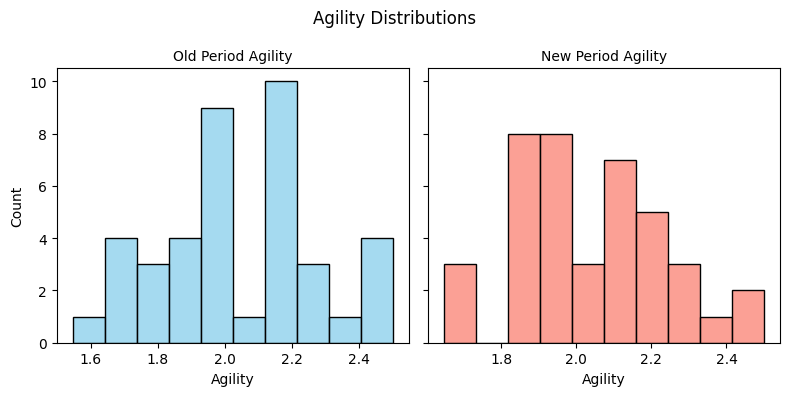

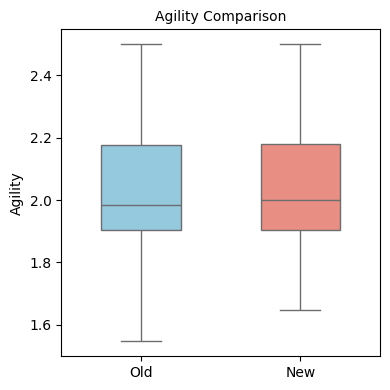

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
sns.histplot(old_period, bins=10, color='skyblue', ax=axes[0], kde=False, edgecolor='black')
axes[0].set_title('Old Period Agility', fontsize=10)
axes[0].set_xlabel('Agility')
axes[0].set_ylabel('Count')
axes[0].grid(False)

sns.histplot(new_period, bins=10, color='salmon', ax=axes[1], kde=False, edgecolor='black')
axes[1].set_title('New Period Agility', fontsize=10)
axes[1].set_xlabel('Agility')
axes[1].set_ylabel('')
axes[1].grid(False)

fig.suptitle('Agility Distributions', fontsize=12)
plt.tight_layout()
plt.savefig('agility_histogram.png')
plt.show()


plt.figure(figsize=(4, 4))
data = [old_period, new_period]
sns.boxplot(data=data, palette=['skyblue', 'salmon'], width=0.5)
plt.xticks([0, 1], ['Old', 'New'])
plt.title('Agility Comparison', fontsize=10)
plt.ylabel('Agility')
plt.grid(False)
plt.tight_layout()
plt.savefig('agility_boxplot.png')
plt.show()

<div style="font-family:Tahoma, sans-serif; direction:rtl; line-height:1.8; font-size:15px; text-align:justify; padding:12px; border:1px solid #ddd; border-radius:8px; box-sizing:border-box; max-width:100%; margin:0 auto;">
  <p>
    هیستوگرام‌ها: توزیع قدیم اوج در بازه ۲.۰ تا ۲.۲ دارد، در حالی که توزیع جدید متمرکزتر در ۲.۰ است. 
    با این حال، دامنه مشابه نشان از عدم تغییر عمده دارد.
  </p>
  <p>
    باکس‌پلات: میانه‌ها (۱.۹۸۵ در برابر ۲.۰۰۰) نزدیک هستند و دامنه مشابه، بدون اوت‌لایرهای چشمگیر، 
    تأییدکننده عدم تفاوت است.
  </p>
</div>


<div style="font-family:Tahoma, sans-serif; direction:rtl; line-height:1.8; font-size:17px; text-align:justify; padding:12px; border:1px solid #ddd; border-radius:8px; box-sizing:border-box; max-width:100%; margin:0 auto;">
  <p style="font-weight:bold; color:#0066cc; margin-top:0;">
    نتیجه‌گیری کلی
  </p>
  <p>
  با توجه به آمار توصیفی (اختلاف ناچیز میانگین)، نرمال بودن داده‌ها، و p-value بالای t-test، فرضیه افزایش میانگین چابکی رد می‌شود. پلات‌ها نشان‌دهنده توزیع‌های مشابه هستند، بنابراین هیچ بهبود معنادار یا عملی در چابکی بازیکنان برتر مشاهده نمی‌شود. پیشنهاد: استفاده از معیارهای دقیق‌تر مانند سرعت یا تست‌های فیزیکی برای تحلیل آینده.
  </p>
</div>